<a href="https://colab.research.google.com/github/Rk-Pudasaini/Ktm_city_temperature_forcast_using_monte_carlo/blob/main/Kathmandu_Climate_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis: Kathmandu Valley Climate data from 1982 to 2023

In this project we perform the data analysis  of climate data for kathmandu valey from 1982 to 2023 year.

The dataset contains data on Kathmandu's climate on different parameters. These data were obtained from the NASA Langley Research Center (LaRC) POWER Project funded through the NASA Earth Science/Applied Science Program extracted from Data Access Viewer API.

`The data is extracted based on the latitude and longitude of Kathmandu `

NASA/POWER CERES/MERRA2 Native Resolution Daily Data
Dates (month/day/year): 01/01/1982 through 12/31/2023
Location: Latitude  27.71   Longitude 85.32
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 1269.39 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999

**Parameter(s):**
* PS              MERRA-2 Surface Pressure (kPa)
* WS2M            MERRA-2 Wind Speed at 2 Meters (m/s)
* WS2M_MAX        MERRA-2 Wind Speed at 2 Meters Maximum (m/s)
* WS2M_MIN        MERRA-2 Wind Speed at 2 Meters Minimum (m/s)
* WS2M_RANGE      MERRA-2 Wind Speed at 2 Meters Range (m/s)
* WS10M           MERRA-2 Wind Speed at 10 Meters (m/s)
* WS10M_MAX       MERRA-2 Wind Speed at 10 Meters Maximum (m/s)
* WS10M_MIN       MERRA-2 Wind Speed at 10 Meters Minimum (m/s)
* WS10M_RANGE     MERRA-2 Wind Speed at 10 Meters Range (m/s)
* QV2M            MERRA-2 Specific Humidity at 2 Meters (g/kg)
* RH2M            MERRA-2 Relative Humidity at 2 Meters (%)
* PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/day)
* T2M             MERRA-2 Temperature at 2 Meters (C)
* T2MWET          MERRA-2 Wet Bulb Temperature at 2 Meters (C)
* TS              MERRA-2 Earth Skin Temperature (C)
* T2M_RANGE       MERRA-2 Temperature at 2 Meters Range (C)
* T2M_MAX         MERRA-2 Temperature at 2 Meters Maximum (C)
* T2M_MIN         MERRA-2 Temperature at 2 Meters Minimum (C)


In [ ]:
#import necessary library
import calendar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#read the csv containing data
df = pd.read_csv('/content/Kathmandu_Daily_Climate_Data.csv')
df.head()

YEAR  DOY    T2M  T2MWET     TS  T2M_RANGE  T2M_MAX  T2M_MIN  QV2M   RH2M  \
0  1982    1  10.93    4.36   8.14      11.92    18.41     6.48  3.78  41.69   
1  1982    2  10.20    3.57   7.24      11.12    17.26     6.15  3.54  41.00   
2  1982    3  11.08    4.43   8.07      11.27    17.80     6.52  3.78  41.19   
3  1982    4  13.26    6.25  10.29      10.85    20.05     9.19  4.15  39.25   
4  1982    5  14.07    8.05  11.19      10.42    20.92    10.49  5.25  46.62   

   PRECTOTCORR     PS  WS2M  WS2M_MAX  WS2M_MIN  WS2M_RANGE  WS10M  WS10M_MAX  \
0          0.0  87.60  1.12      3.20      0.16        3.03   1.67       4.32   
1          0.0  87.45  1.17      3.52      0.08        3.45   1.66       4.73   
2          0.0  87.49  1.01      3.05      0.04        3.02   1.45       4.05   
3          0.0  87.71  1.22      3.06      0.30        2.77   1.76       4.08   
4          0.0  87.67  1.68      4.02      0.66        3.36   2.51       5.52   

   WS10M_MIN  WS10M_RANGE  
0       0.30         4.02  
1       0.07         4.66  
2       0.01         4.05  
3       0.44         3.64  
4       1.07         4.45

In [ ]:
#get the shape of the data i.e no of rows and columns
df.shape

(15340, 20)

In [ ]:
# function to format the date columns in year- month and day type
def format_date(df):
    # Convert Year and DOY columns to datetime
    df['Date'] = pd.to_datetime(df['YEAR'].astype(str) + df['DOY'].astype(str), format='%Y%j')

    # Format the Date column as desired (Year-Month-Day)
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

    # Reorder columns to make "Date" the first column
    date_column = df.pop('Date')
    df.insert(0, 'Date', date_column)

    # Convert 'DATE' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Drop the "Year" and "DOY" columns
    df.drop(['YEAR', 'DOY'], axis=1, inplace=True)

    return df


In [ ]:
df = format_date(df)
df.head()

Date    T2M  T2MWET     TS  T2M_RANGE  T2M_MAX  T2M_MIN  QV2M   RH2M  \
0 1982-01-01  10.93    4.36   8.14      11.92    18.41     6.48  3.78  41.69   
1 1982-01-02  10.20    3.57   7.24      11.12    17.26     6.15  3.54  41.00   
2 1982-01-03  11.08    4.43   8.07      11.27    17.80     6.52  3.78  41.19   
3 1982-01-04  13.26    6.25  10.29      10.85    20.05     9.19  4.15  39.25   
4 1982-01-05  14.07    8.05  11.19      10.42    20.92    10.49  5.25  46.62   

   PRECTOTCORR     PS  WS2M  WS2M_MAX  WS2M_MIN  WS2M_RANGE  WS10M  WS10M_MAX  \
0          0.0  87.60  1.12      3.20      0.16        3.03   1.67       4.32   
1          0.0  87.45  1.17      3.52      0.08        3.45   1.66       4.73   
2          0.0  87.49  1.01      3.05      0.04        3.02   1.45       4.05   
3          0.0  87.71  1.22      3.06      0.30        2.77   1.76       4.08   
4          0.0  87.67  1.68      4.02      0.66        3.36   2.51       5.52   

   WS10M_MIN  WS10M_RANGE  
0       0.30         4.02  
1       0.07         4.66  
2       0.01         4.05  
3       0.44         3.64  
4       1.07         4.45

In [ ]:
# get the dimention again after formating
df.shape

(15340, 19)

In [ ]:
#Get the column names
df.columns

Index(['Date', 'T2M', 'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN',
       'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS2M', 'WS2M_MAX', 'WS2M_MIN',
       'WS2M_RANGE', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE'],
      dtype='object')

In [ ]:
#Check the null values in the data frame
df.isnull().sum()

Date           0
T2M            0
T2MWET         0
TS             0
T2M_RANGE      0
T2M_MAX        0
T2M_MIN        0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS2M           0
WS2M_MAX       0
WS2M_MIN       0
WS2M_RANGE     0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
dtype: int64

In [ ]:
# Rename columns for understanding purpose
df = df.rename(columns={
    'PS': 'Pressure',
    'WS2M': 'WindSpeed_2m',
    'WS2M_MAX': 'MaxWindSpeed_2m',
    'WS2M_MIN': 'MinWindSpeed_2m',
    'WS2M_RANGE': 'WindSpeedRange_2m',
    'WS10M': 'WindSpeed_10m',
    'WS10M_MAX': 'MaxWindSpeed_10m',
    'WS10M_MIN': 'MinWindSpeed_10m',
    'WS10M_RANGE': 'WindSpeedRange_10m',
    'T2M': 'Temp_2m',
    'T2MWET': 'WetBulbTemp_2m',
    'TS': 'EarthSkinTemp',
    'T2M_RANGE': 'TempRange_2m',
    'T2M_MAX': 'MaxTemp_2m',
    'T2M_MIN': 'MinTemp_2m',
    'QV2M': 'Humidity_2m',
    'RH2M': 'RH_2m',
    'PRECTOTCORR': 'Precip'
})

In [ ]:
#Get the columns name after renaming
df.columns

Index(['Date', 'Temp_2m', 'WetBulbTemp_2m', 'EarthSkinTemp', 'TempRange_2m',
       'MaxTemp_2m', 'MinTemp_2m', 'Humidity_2m', 'RH_2m', 'Precip',
       'Pressure', 'WindSpeed_2m', 'MaxWindSpeed_2m', 'MinWindSpeed_2m',
       'WindSpeedRange_2m', 'WindSpeed_10m', 'MaxWindSpeed_10m',
       'MinWindSpeed_10m', 'WindSpeedRange_10m'],
      dtype='object')

In [ ]:
#check the data types of each columns
df.dtypes

Date                  datetime64[ns]
Temp_2m                      float64
WetBulbTemp_2m               float64
EarthSkinTemp                float64
TempRange_2m                 float64
MaxTemp_2m                   float64
MinTemp_2m                   float64
Humidity_2m                  float64
RH_2m                        float64
Precip                       float64
Pressure                     float64
WindSpeed_2m                 float64
MaxWindSpeed_2m              float64
MinWindSpeed_2m              float64
WindSpeedRange_2m            float64
WindSpeed_10m                float64
MaxWindSpeed_10m             float64
MinWindSpeed_10m             float64
WindSpeedRange_10m           float64
dtype: object

In [ ]:
#Print the head of the data
df.head()

Date  Temp_2m  WetBulbTemp_2m  EarthSkinTemp  TempRange_2m  \
0 1982-01-01    10.93            4.36           8.14         11.92   
1 1982-01-02    10.20            3.57           7.24         11.12   
2 1982-01-03    11.08            4.43           8.07         11.27   
3 1982-01-04    13.26            6.25          10.29         10.85   
4 1982-01-05    14.07            8.05          11.19         10.42   

   MaxTemp_2m  MinTemp_2m  Humidity_2m  RH_2m  Precip  Pressure  WindSpeed_2m  \
0       18.41        6.48         3.78  41.69     0.0     87.60          1.12   
1       17.26        6.15         3.54  41.00     0.0     87.45          1.17   
2       17.80        6.52         3.78  41.19     0.0     87.49          1.01   
3       20.05        9.19         4.15  39.25     0.0     87.71          1.22   
4       20.92       10.49         5.25  46.62     0.0     87.67          1.68   

   MaxWindSpeed_2m  MinWindSpeed_2m  WindSpeedRange_2m  WindSpeed_10m  \
0             3.20             0.16               3.03           1.67   
1             3.52             0.08               3.45           1.66   
2             3.05             0.04               3.02           1.45   
3             3.06             0.30               2.77           1.76   
4             4.02             0.66               3.36           2.51   

   MaxWindSpeed_10m  MinWindSpeed_10m  WindSpeedRange_10m  
0              4.32              0.30                4.02  
1              4.73              0.07                4.66  
2              4.05              0.01                4.05  
3              4.08              0.44                3.64  
4              5.52              1.07                4.45

In [ ]:
#Get the Statistical Summary of the given data
print("\nStatistical Summary:")
df.describe().T


Statistical Summary:


count       mean        std    min      25%    50%  \
Temp_2m             15340.0  19.202557   5.031258   4.12  14.7975  20.66   
WetBulbTemp_2m      15340.0  13.856804   6.609551  -2.92   7.9300  14.41   
EarthSkinTemp       15340.0  18.470047   6.468848   2.60  12.4600  20.43   
TempRange_2m        15340.0   9.705057   3.080306   2.02   7.2000   9.88   
MaxTemp_2m          15340.0  24.753992   4.745670   9.01  21.0500  25.05   
MinTemp_2m          15340.0  15.048926   5.102343  -0.12  10.5500  16.09   
Humidity_2m         15340.0   9.522055   5.390868   0.98   4.6400   8.00   
RH_2m               15340.0  56.557127  23.389310   5.06  36.3800  55.06   
Precip              15340.0   2.502519   5.642385   0.00   0.0000   0.06   
Pressure            15340.0  87.268512   0.403068  85.92  86.9500  87.29   
WindSpeed_2m        15340.0   1.514950   0.380257   0.54   1.2200   1.47   
MaxWindSpeed_2m     15340.0   3.425117   0.785485   0.78   2.8500   3.38   
MinWindSpeed_2m     15340.0   0.328735   0.212777   0.00   0.1600   0.29   
WindSpeedRange_2m   15340.0   3.096359   0.726636   0.58   2.5700   3.07   
WindSpeed_10m       15340.0   2.188517   0.536365   0.83   1.7800   2.13   
MaxWindSpeed_10m    15340.0   4.533397   1.035791   1.39   3.7900   4.47   
MinWindSpeed_10m    15340.0   0.554595   0.362642   0.00   0.2700   0.49   
WindSpeedRange_10m  15340.0   3.978746   0.959771   0.76   3.3000   3.95   

                      75%    max  
Temp_2m             23.15  30.11  
WetBulbTemp_2m      20.53  23.75  
EarthSkinTemp       23.65  31.46  
TempRange_2m        12.02  19.20  
MaxTemp_2m          28.01  37.30  
MinTemp_2m          19.73  24.90  
Humidity_2m         15.38  19.59  
RH_2m               79.62  97.12  
Precip               2.22  91.66  
Pressure            87.60  88.44  
WindSpeed_2m         1.78   3.62  
MaxWindSpeed_2m      3.95   7.69  
MinWindSpeed_2m      0.45   2.03  
WindSpeedRange_2m    3.59   6.75  
WindSpeed_10m        2.54   5.34  
MaxWindSpeed_10m     5.20  10.60  
MinWindSpeed_10m     0.77   3.20  
WindSpeedRange_10m   4.61   9.11

<ipython-input-62-2ee27839a1e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


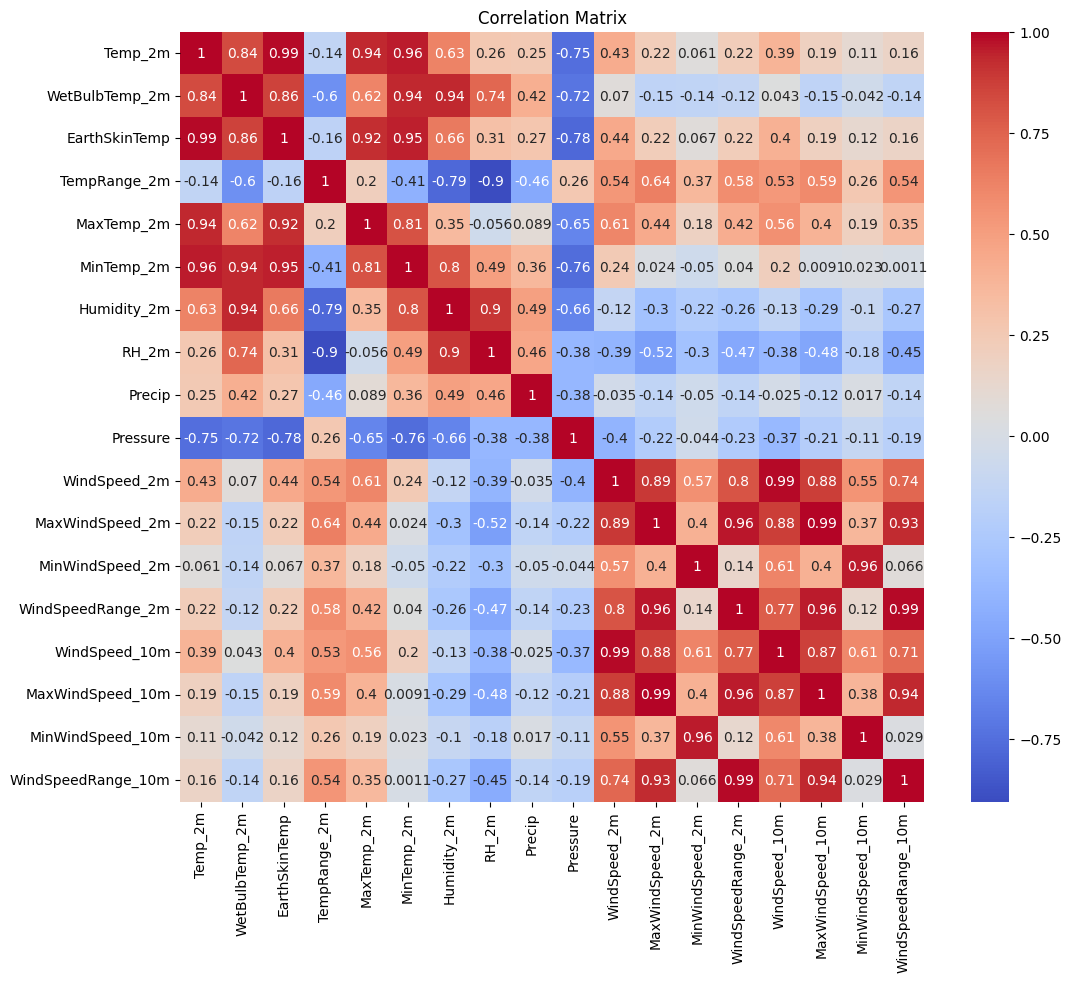

In [ ]:
#Get the corelation Matrix to figure out the relationships between variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

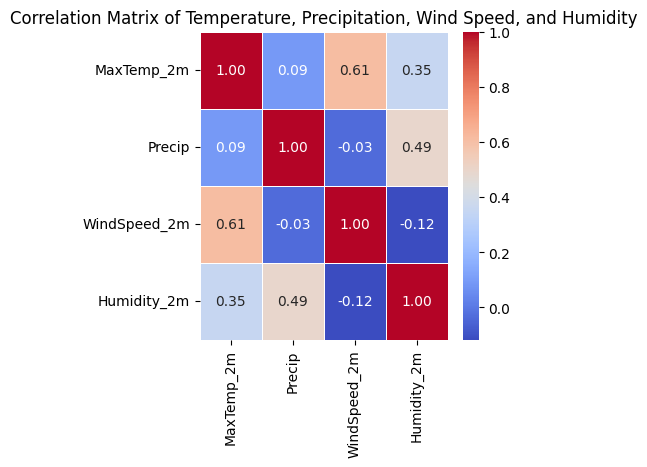

In [ ]:
#How does temperature correlate with precipitation, wind speed, or humidity?

# Select the relevant columns for analysis
columns_of_interest = ['MaxTemp_2m', 'Precip', 'WindSpeed_2m', 'Humidity_2m']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Temperature, Precipitation, Wind Speed, and Humidity')
plt.show()


In [ ]:
#Defining Function to figure out the variable distribution from 1982 to 2023
def variable_distribution_by_year(df, variable):
    # Group by year and calculate mean of the specified variable for each year
    variable_distribution = df.groupby(df['Date'].dt.year)[variable].mean()

    # Plot the line graph
    plt.plot(variable_distribution.index, variable_distribution.values, marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel(f'Average {variable}')
    plt.title(f'{variable.capitalize()} Distribution over the years in Kathmandu City ')
    plt.xticks(rotation=45)
    plt.grid(True)

# Define a function to plot variable trends for all variables
def plot_variable_trends(df):
    # Get the list of variables
    variable_list = df.columns.tolist()
    # Drop 'Date' from the list of variables
    variable_list.remove('Date')

    # Determine number of rows and columns for subplots
    num_plots = len(variable_list)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols
    if num_plots % num_cols != 0:
        num_rows += 1

    # Create subplots with specified figure size
    plt.figure(figsize=(15, 4 * num_rows))

    # Plot each variable distribution by year
    for i, variable in enumerate(variable_list, 1):
        plt.subplot(num_rows, num_cols, i)
        variable_distribution_by_year(df, variable)

    plt.tight_layout()
    plt.show()


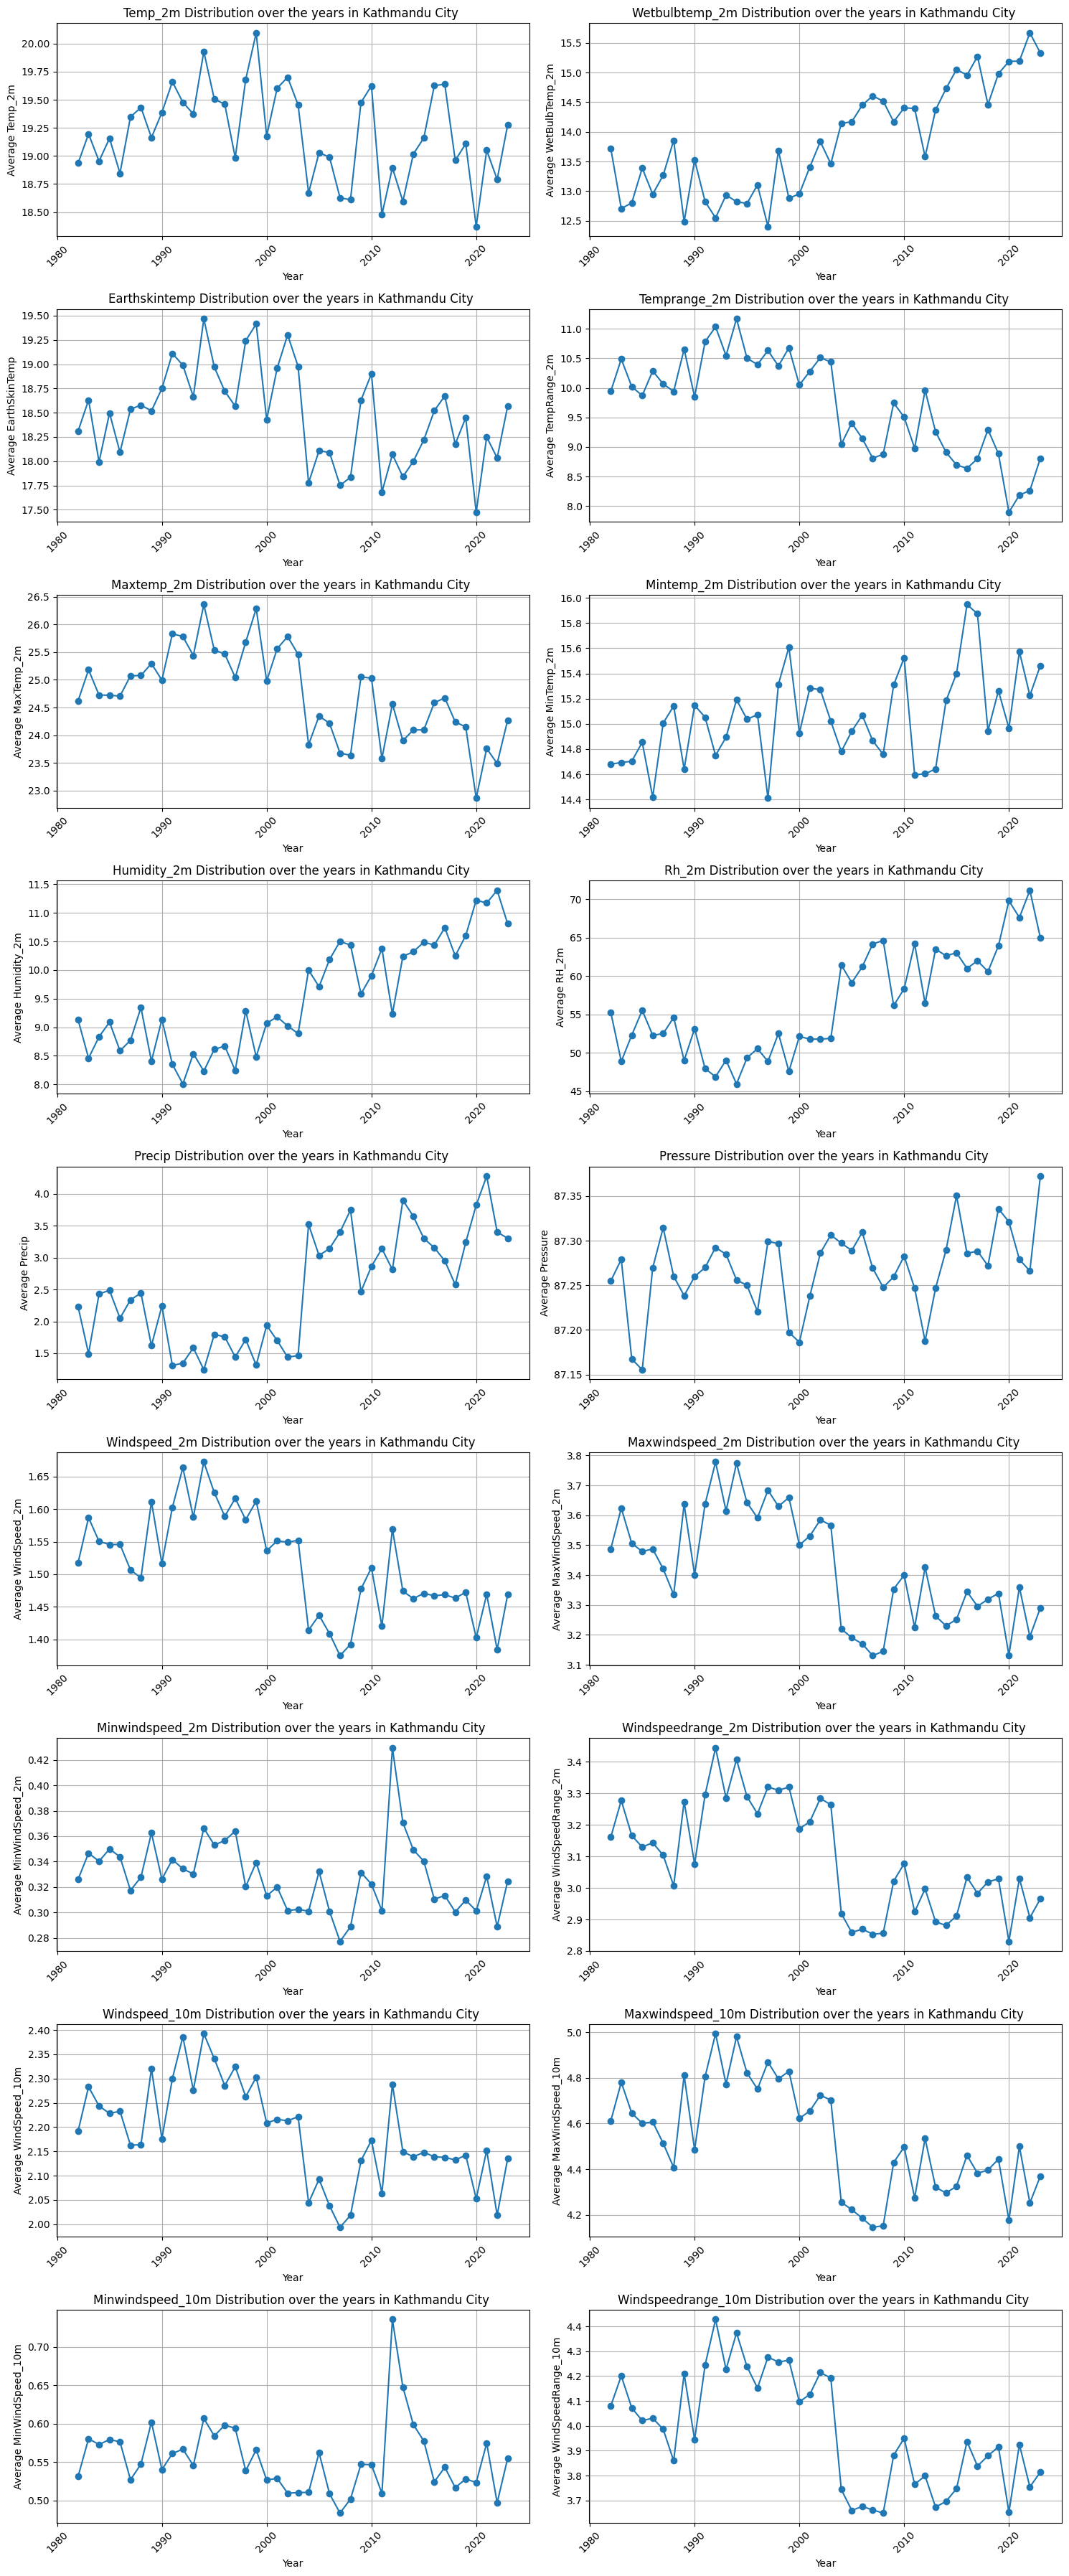

In [ ]:
#Plot the trends
plot_variable_trends(df)

In [ ]:
#Plot bargraph describing the month wise variable distribution for specific year
def plot_variable_distribution_by_year(df, year):
    # Get the list of variables
    variable_list = df.columns.tolist()
    # Drop 'Date' from the list of variables
    variable_list.remove('Date')

    # Determine number of rows and columns for subplots
    num_plots = len(variable_list)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols
    if num_plots % num_cols != 0:
        num_rows += 1

    # Create subplots with specified figure size
    plt.figure(figsize=(15, 4 * num_rows))

    # Plot each variable distribution by year
    for i, variable in enumerate(variable_list, 1):
        # Filter data for the specified year
        df_year = df[df['Date'].dt.year == year]

        # Group by month and calculate the mean value of total of the specified variable for each month
        variable_by_month = df_year.groupby(df_year['Date'].dt.month)[variable].mean()

        # Map month numbers to month names
        variable_by_month.index = variable_by_month.index.map(lambda x: calendar.month_name[x])

        # Plot the bar graph
        plt.subplot(num_rows, num_cols, i)
        variable_by_month.plot(kind='bar', color='skyblue')
        plt.xlabel('Month')
        plt.ylabel(f'Total Average {variable}')
        plt.title(f'Monthly Distribution of {variable.capitalize()} in {year} for Kathmandu City ')
        plt.xticks(rotation=45)
        plt.grid(True)

    plt.tight_layout()
    plt.show()

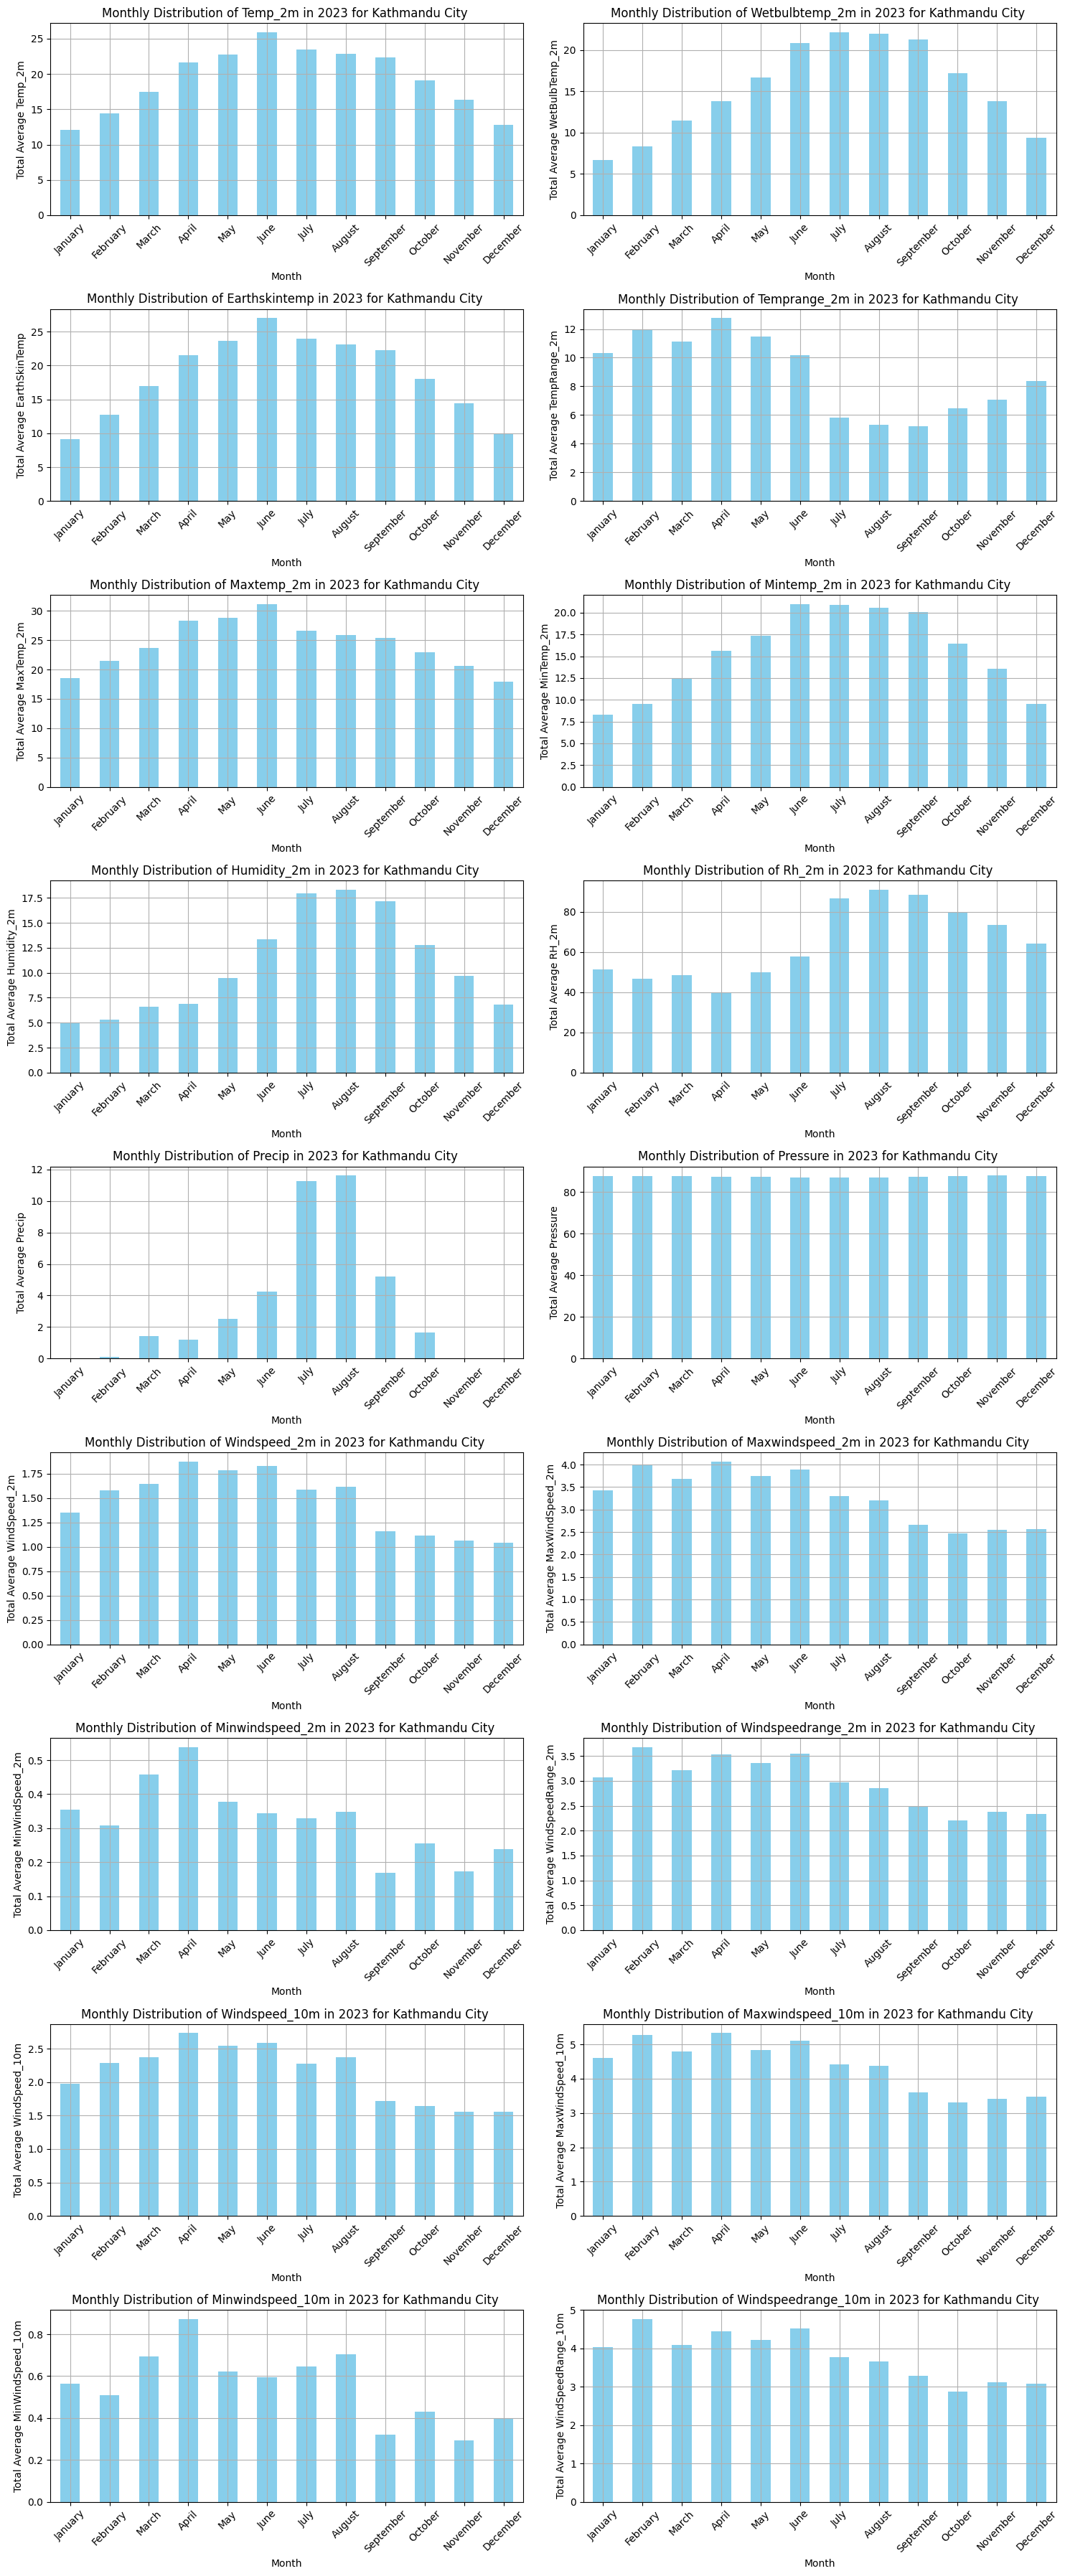

In [ ]:
# Check the distribution for 2023 Year
plot_variable_distribution_by_year(df, 2023)

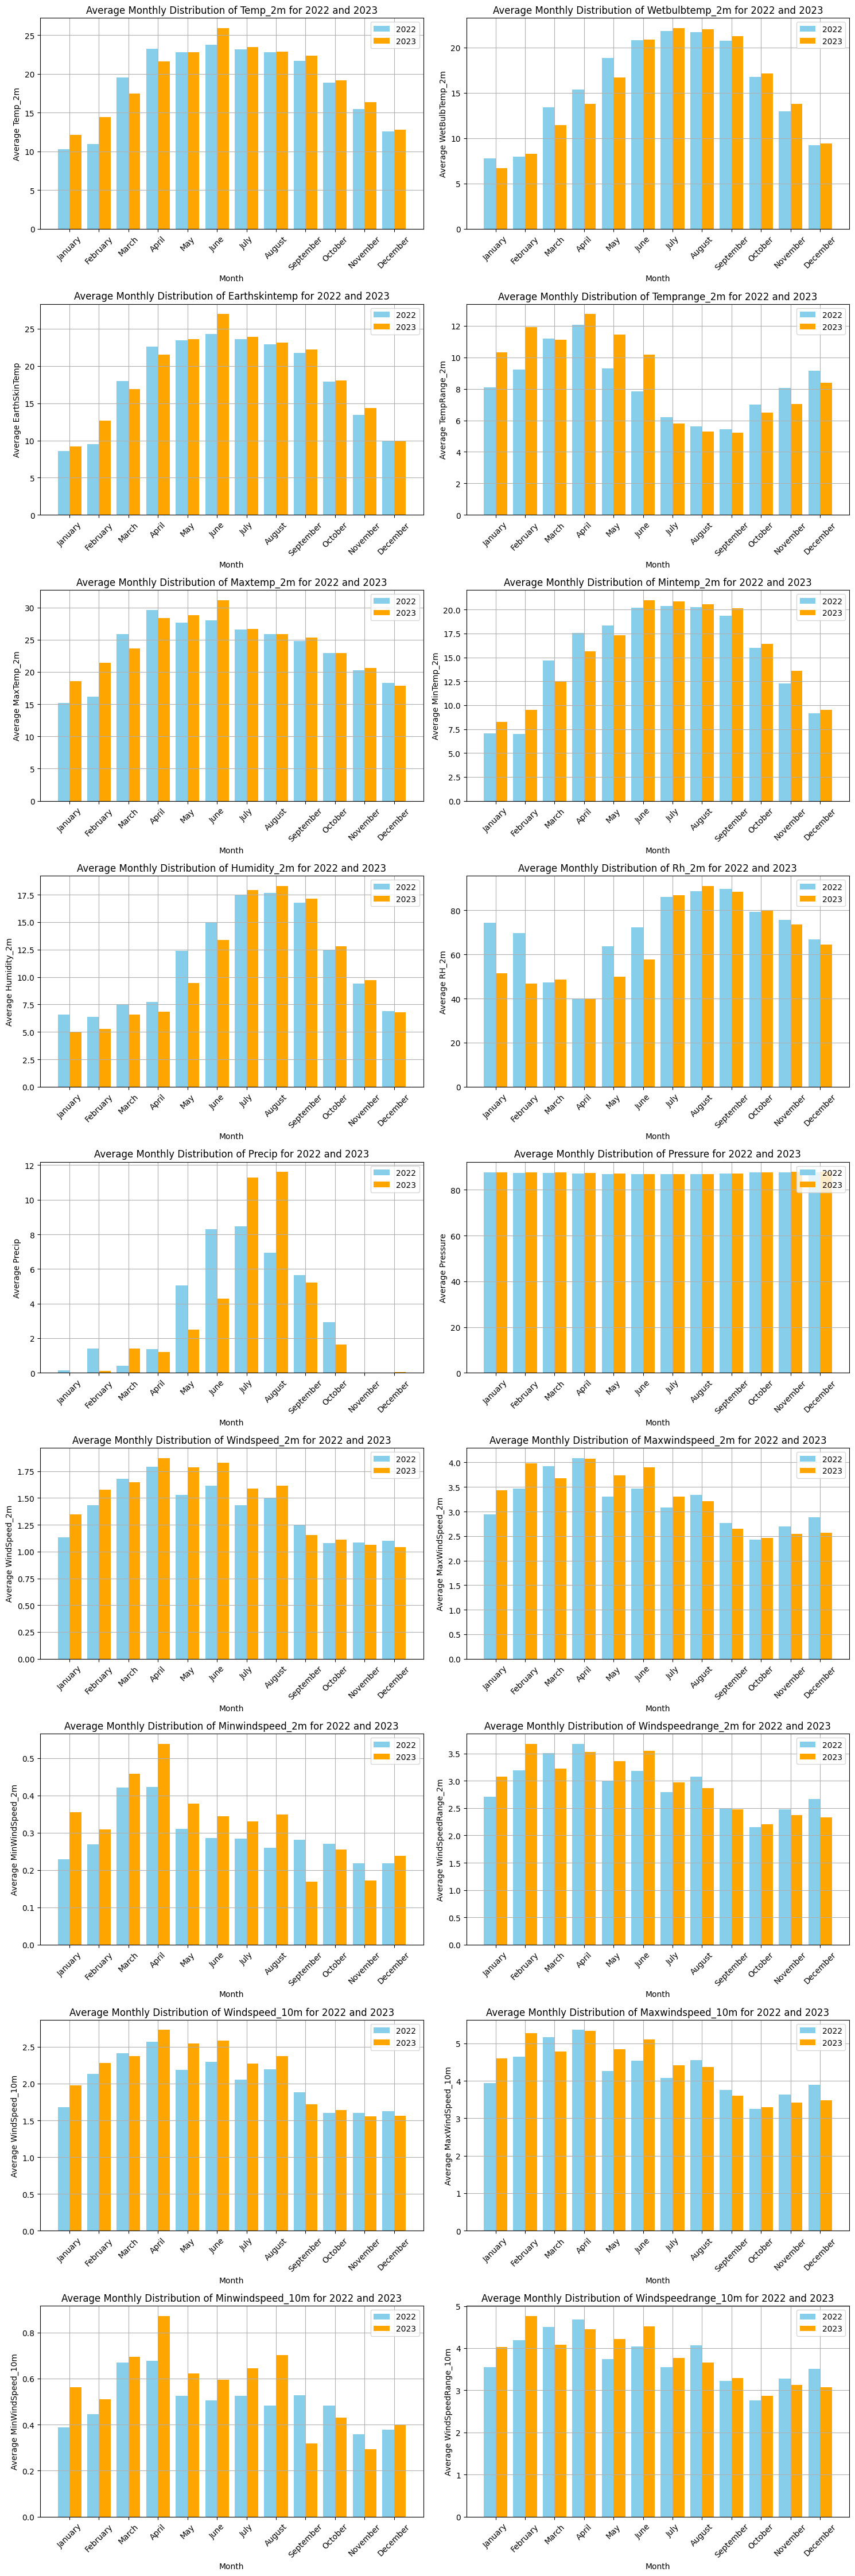

In [ ]:
#Function to compare the variable distribution for different years
def plot_variable_distribution_comparision_by_year(df, prev_year, this_year):
    # Get the list of variables
    variable_list = df.columns.tolist()
    # Drop 'Date' from the list of variables
    variable_list.remove('Date')

    # Determine number of rows and columns for subplots
    num_plots = len(variable_list)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols
    if num_plots % num_cols != 0:
        num_rows += 1

    # Create subplots with specified figure size
    plt.figure(figsize=(15, 5 * num_rows))

    # Iterate over each variable
    for i, variable in enumerate(variable_list, 1):
        # Filter data for the previous year
        df_prev = df[df['Date'].dt.year == prev_year]

        # Group by month and calculate total of the specified variable for each month in the previous year
        prev_year_variable_by_month = df_prev.groupby(df_prev['Date'].dt.month)[variable].mean()

        # Filter data for the current year
        df_this = df[df['Date'].dt.year == this_year]

        # Group by month and calculate total of the specified variable for each month in the current year
        this_year_variable_by_month = df_this.groupby(df_this['Date'].dt.month)[variable].mean()

        # Plot the bar graph for both years
        plt.subplot(num_rows, num_cols, i)
        width = 0.4  # Width of the bars
        x = range(1, 13)  # Month numbers
        plt.bar(x, prev_year_variable_by_month, width=width, label=f'{prev_year}', color='skyblue')
        plt.bar([i + width for i in x], this_year_variable_by_month, width=width, label=f'{this_year}', color='orange')

        plt.xlabel('Month')
        plt.ylabel(f'Average {variable}')
        plt.title(f'Average Monthly Distribution of {variable.capitalize()} for {prev_year} and {this_year}')
        plt.xticks([i + width/2 for i in x], calendar.month_name[1:], rotation=45)
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Comparaions of the variable for year 2022 and 2023
plot_variable_distribution_comparision_by_year(df, 2022, 2023)


In [ ]:
#function to plot two variables for the given year
def plot_two_variables(df, year, variable1, variable2):
    plt.figure(figsize=(10, 6))

    df_year = df[df['Date'].dt.year == year]

    data_variable1 = df_year[variable1]
    data_variable2 = df_year[variable2]

    plt.plot(df_year['Date'], data_variable1, label=f'{variable1} ({year})', linestyle='-', marker='.')
    plt.plot(df_year['Date'], data_variable2, label=f'{variable2} ({year})', linestyle='-', marker='.')

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Kathmandu Valley {variable1.capitalize()} and {variable2.capitalize()} for the year {year}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()



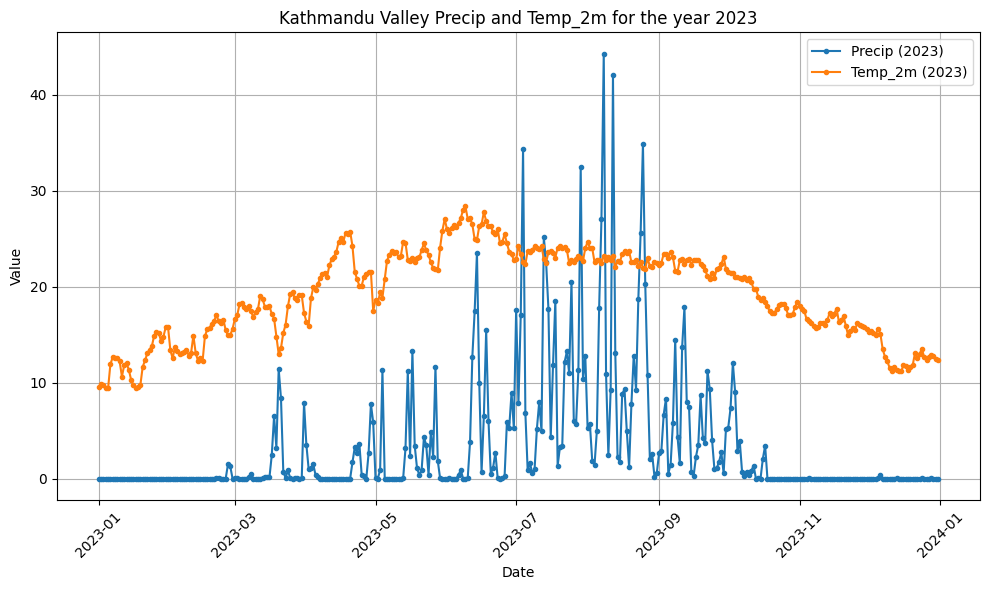

In [ ]:
# Example usage of plotting precipation and temperature for the year 2023
plot_two_variables(df, 2023, 'Precip', 'Temp_2m')

In [ ]:
#Function to plot two variable trend over the year
def plot_two_variables_trend(df, variable1, variable2):
    plt.figure(figsize=(10, 6))

    # Group by year and calculate the mean of the two variables for each year
    variable1_trend = df.groupby(df['Date'].dt.year)[variable1].mean()
    variable2_trend = df.groupby(df['Date'].dt.year)[variable2].mean()

    # Plot the line graph for variable1 trend
    plt.plot(variable1_trend.index, variable1_trend.values, label=variable1, linestyle='-', marker='o')

    # Plot the line graph for variable2 trend
    plt.plot(variable2_trend.index, variable2_trend.values, label=variable2, linestyle='-', marker='o')

    plt.xlabel('Year')
    plt.ylabel('Average Value')
    plt.title(f'{variable1.capitalize()} and {variable2.capitalize()} Trend (1982-2023) for Kathmandu Valley')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


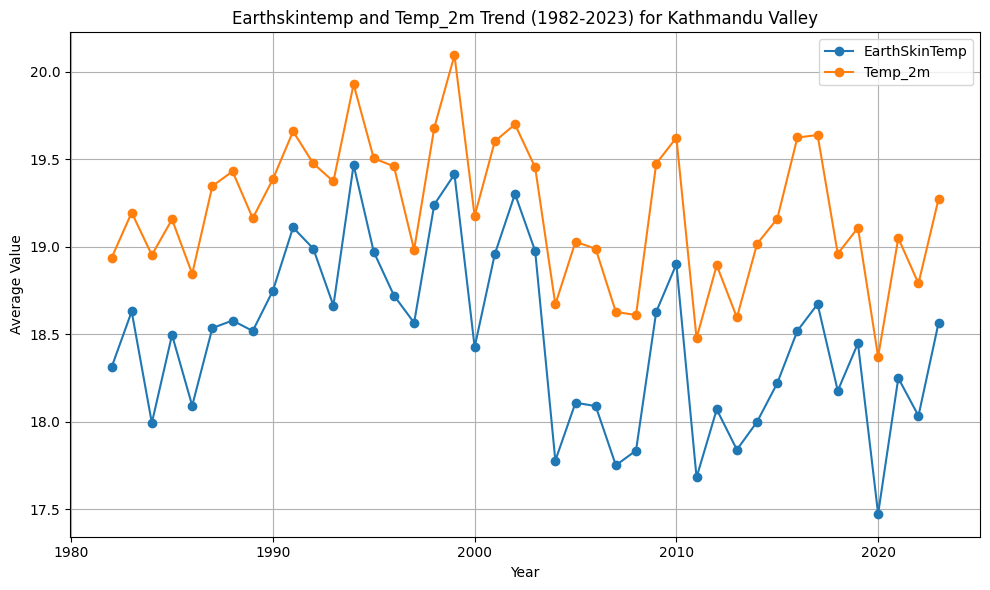

In [ ]:
# Plot the trend of earth skin temperature vs 2 meter surface temperature of Kathmandu valley over the year
plot_two_variables_trend(df, 'EarthSkinTemp', 'Temp_2m')


In [ ]:
#Function to compare specific variable for the give 2 years
def compare_variable_between_years(df, variable, prev_year, this_year):
    plt.figure(figsize=(10, 6))

    # Filter data for the previous year
    df_prev = df[df['Date'].dt.year == prev_year]
    prev_year_monthly_mean = df_prev.groupby(df_prev['Date'].dt.month)[variable].mean()

    # Filter data for the current year
    df_this = df[df['Date'].dt.year == this_year]
    this_year_monthly_mean = df_this.groupby(df_this['Date'].dt.month)[variable].mean()

    # Plot the line graphs for both years
    plt.plot(prev_year_monthly_mean.index, prev_year_monthly_mean.values, label=f'{prev_year}', linestyle='-', marker='o')
    plt.plot(this_year_monthly_mean.index, this_year_monthly_mean.values, label=f'{this_year}', linestyle='-', marker='o')

    plt.xlabel('Month')
    plt.ylabel(f'Average {variable}')
    plt.title(f'Comparison of {variable} in {prev_year} and {this_year} in Kathmandu Valley')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)  # Map month numbers to month names
    plt.tight_layout()
    plt.show()

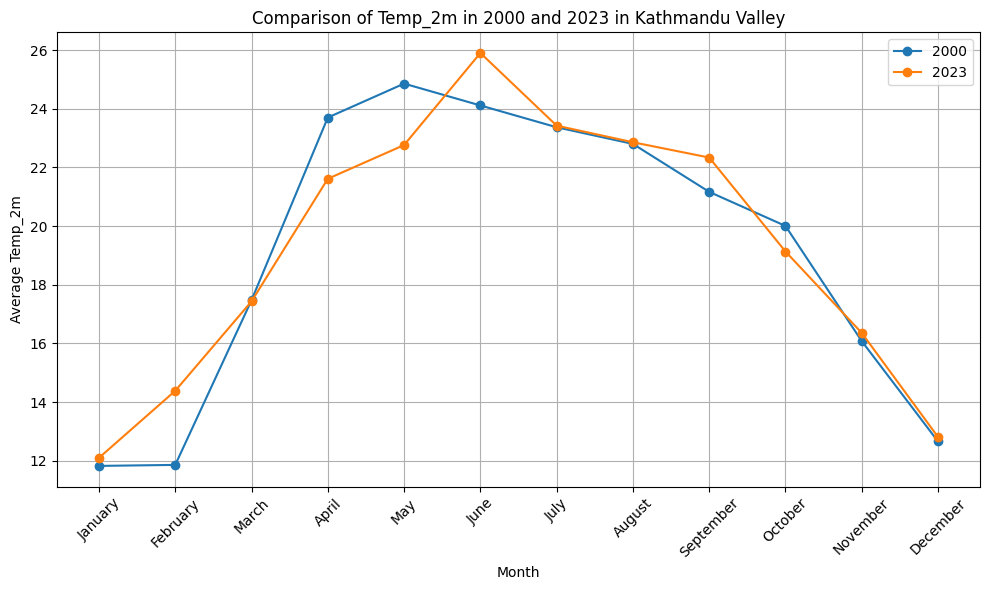

In [ ]:
# Comparision of 2 meter Surface temperature of kathmandu valley in 2000 and in 2023
compare_variable_between_years(df, 'Temp_2m', 2000, 2023)

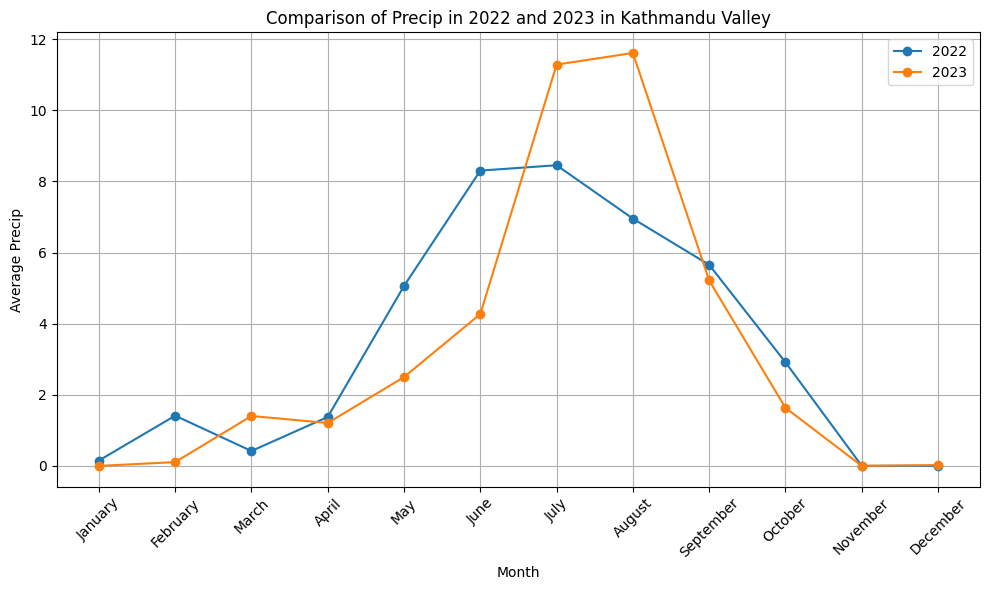

In [ ]:
# Example usage:
compare_variable_between_years(df, 'Precip', 2022, 2023)

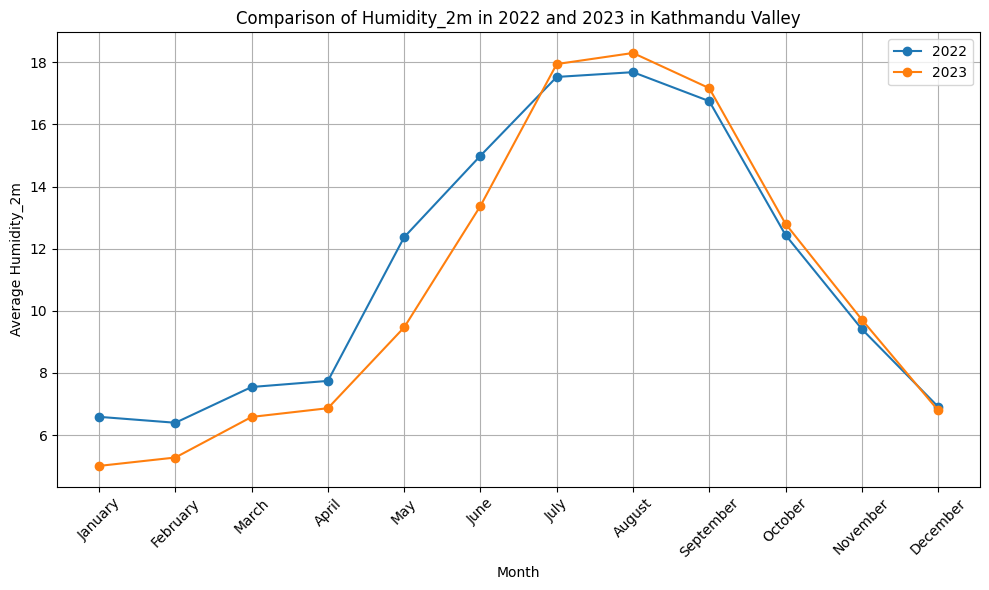

In [ ]:
# Example usage:
compare_variable_between_years(df, 'Humidity_2m', 2022, 2023)

In [ ]:
def plot_variables_trend(df, variable, ax=None):

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    else:
        fig = ax.get_figure()

    # Group by year and calculate the mean of the variable for each year
    variable_trend = df.groupby(df['Date'].dt.year)[variable].mean()

    # Plot the line graph for variable trend
    ax.plot(variable_trend.index, variable_trend.values, label=variable, linestyle='-', marker='o')

    ax.set_xlabel('Year')
    ax.set_ylabel('Average Value')
    ax.set_title(f'{variable} Trend (1982-2023) for Kathmandu Valley')
    ax.legend()
    ax.grid(True)

    fig.tight_layout()


def plot_variable_change_trend(df, variable, ax=None):

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    else:
        fig = ax.get_figure()

    # Group by year and calculate the mean of the variable for each year
    variable_trend = df.groupby(df['Date'].dt.year)[variable].mean()

    # Calculate the change in variable between consecutive years
    variable_change = variable_trend.diff()

    # Plot the line graph for variable change trend
    ax.plot(variable_change.index, variable_change.values, linestyle='-',  color = 'orange', marker='.')

    # Add text annotations for variable change values
    for i, txt in enumerate(variable_change.values):
        ax.annotate(f'{txt:.2f}', (variable_change.index[i], variable_change.values[i]),
                    textcoords="offset points", xytext=(0, 5), ha='center')

    ax.set_xlabel('Year')
    ax.set_ylabel(f'Change in {variable}')
    ax.set_title(f'Change in {variable} Trend (1982-2023) for Kathmandu Valley')
    ax.grid(True)

    fig.tight_layout()

def plot_variable_and_change_trend_subplots(df, variables):

    fig, axes = plt.subplots(len(variables), 2, figsize=(15, len(variables)*4))

    for i, variable in enumerate(variables):
        # Plot the variable trend subplot
        plot_variables_trend(df, variable, ax=axes[i][0])

        # Plot the variable change trend subplot
        plot_variable_change_trend(df, variable, ax=axes[i][1])

    plt.tight_layout()
    plt.show()


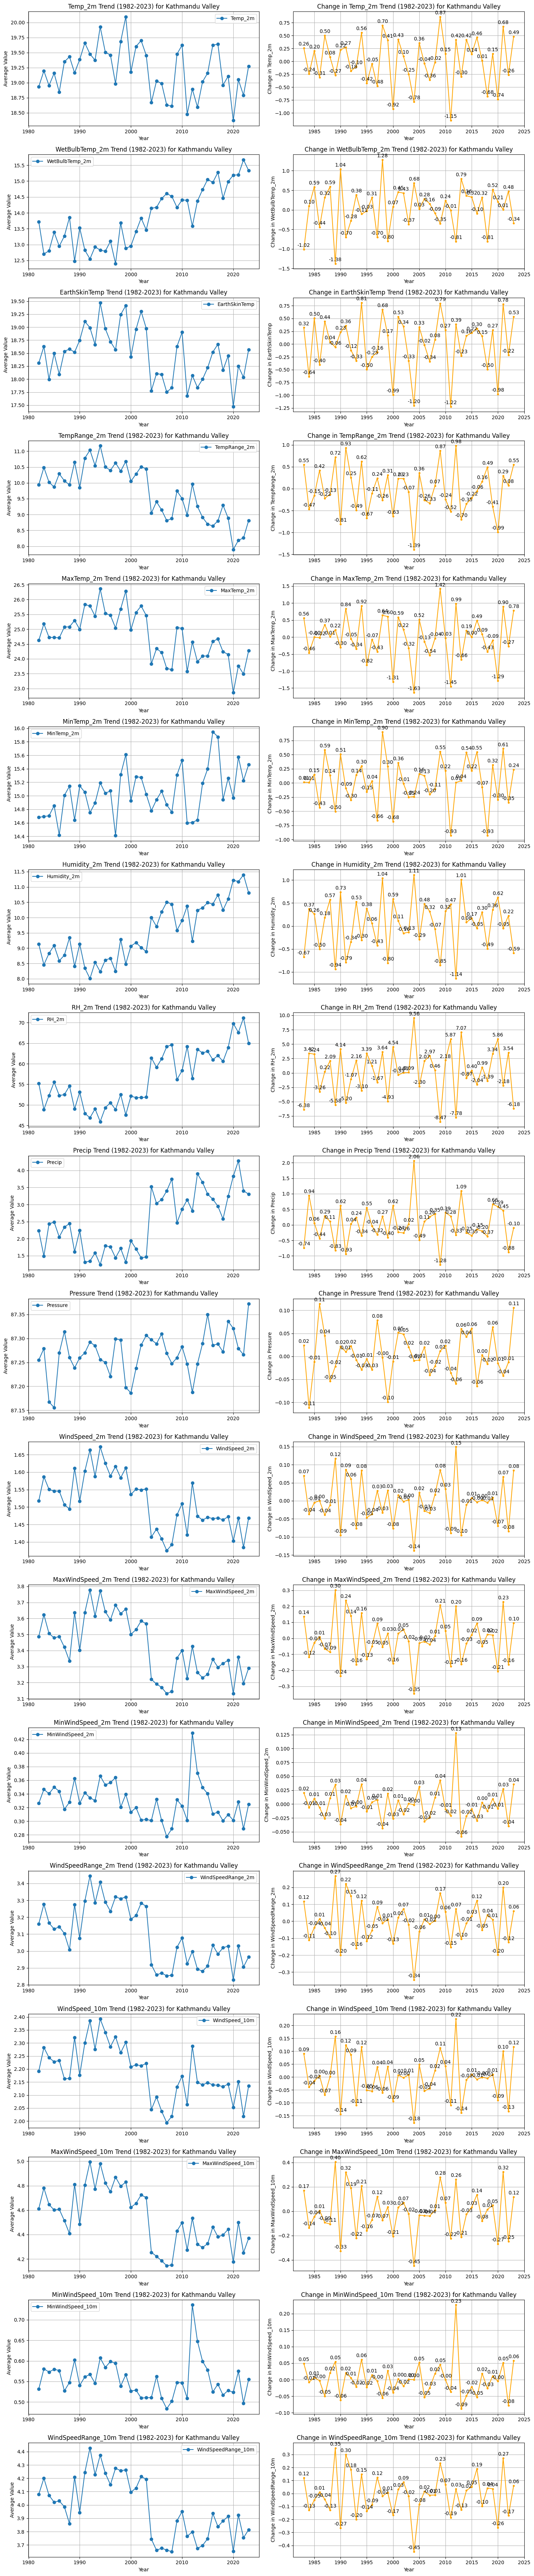

In [ ]:
variables_list = ['Temp_2m', 'WetBulbTemp_2m', 'EarthSkinTemp', 'TempRange_2m',
                  'MaxTemp_2m', 'MinTemp_2m', 'Humidity_2m', 'RH_2m', 'Precip',
                  'Pressure', 'WindSpeed_2m', 'MaxWindSpeed_2m', 'MinWindSpeed_2m',
                  'WindSpeedRange_2m', 'WindSpeed_10m', 'MaxWindSpeed_10m',
                  'MinWindSpeed_10m', 'WindSpeedRange_10m']

# variables_list = ['Temp_2m', 'WetBulbTemp_2m']
# Example usage:
plot_variable_and_change_trend_subplots(df, variables_list )

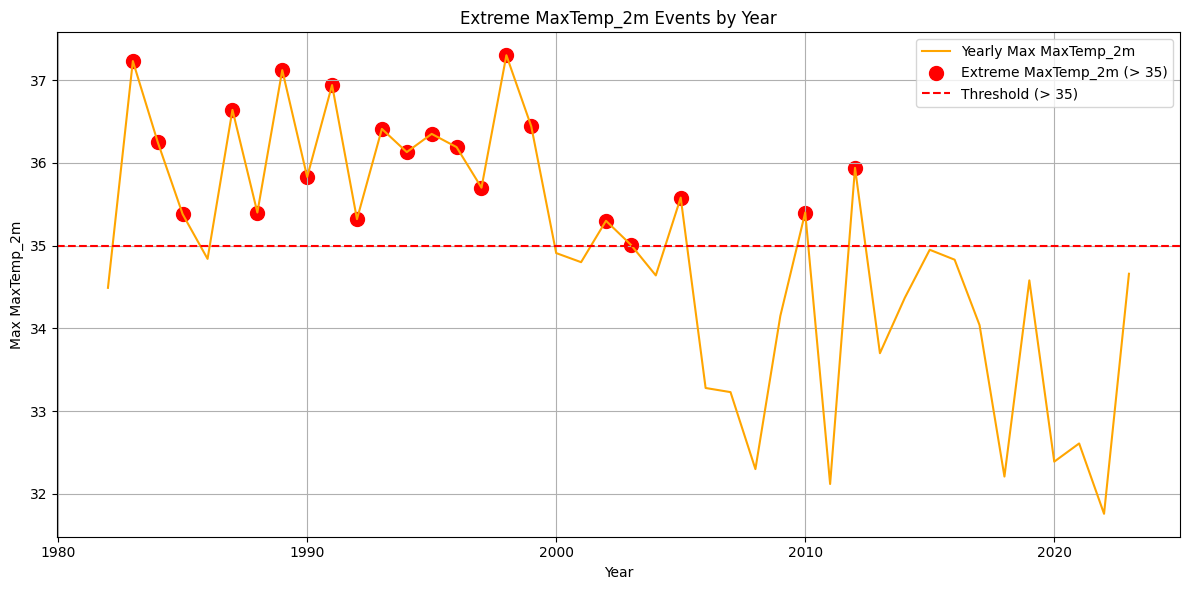

In [ ]:
def extreme_event(df, variable, threshold):
    # Calculate yearly maximum values for the variable
    yearly_max_values = df.groupby(df['Date'].dt.year)[variable].max()

    # Filter extreme events exceeding the threshold
    extreme_events = yearly_max_values[yearly_max_values > threshold]

    # Plot yearly maximum values
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_max_values.index, yearly_max_values.values, label=f'Yearly Max {variable}', color='orange')

    # Plot extreme events exceeding the threshold
    plt.scatter(extreme_events.index, extreme_events.values, color='red', label=f'Extreme {variable} (> {threshold})', marker='o', s=100)

    # Add threshold line
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold (> {threshold})')

    plt.xlabel('Year')
    plt.ylabel(f'Max {variable}')
    plt.title(f'Extreme {variable} Events by Year')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return extreme_events

# Define the threshold for extreme events
temperature_threshold = 35  # Threshold for extreme temperature events (> 35°C)

# Identify extreme temperature events exceeding the threshold and show plot
extreme_temperature_events = extreme_event(df, 'MaxTemp_2m', temperature_threshold)


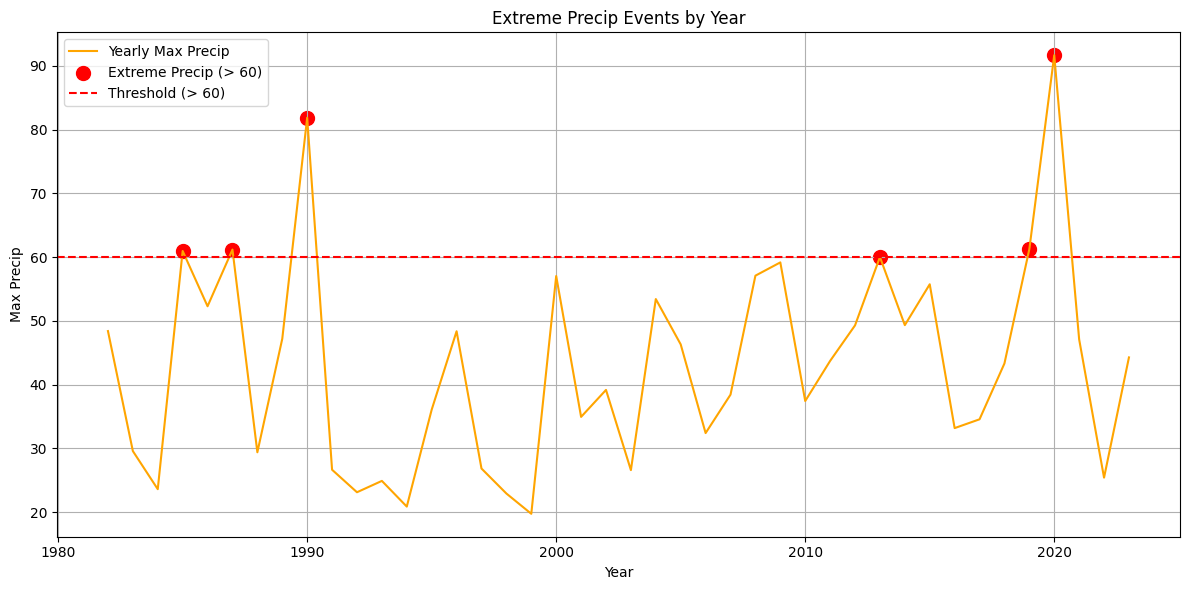

In [ ]:
# Define the threshold for extreme events
precipitation_threshold = 60  # Threshold for extreme temperature events (> 35°C)

# Identify extreme temperature events exceeding the threshold and show plot
extreme_precip_events = extreme_event(df, 'Precip', precipitation_threshold)

In [ ]:
# Filter the DataFrame for June 13, 2012
temperature_june_13_2012 = df[df['Date'] == '2012-06-13']['MaxTemp_2m'].values[0]

print(f"The temperature on June 13, 2012, was {temperature_june_13_2012}°C.")


The temperature on June 13, 2012, was 33.42°C.


In [ ]:
max_precipitation = df['Precip'].max()
min_precipitation = df['Precip'].min()

print("Maximum Precipitation Value:", max_precipitation)
print("Minimum Precipitation Value:", min_precipitation)


Maximum Precipitation Value: 91.66
Minimum Precipitation Value: 0.0


In [ ]:
# Specify the year you're interested in
year_of_interest = 2023  # Change this to the year you want to analyze

# Filter data for the specified year
df_year_of_interest = df[df['Date'].dt.year == year_of_interest]

# Find the maximum and minimum precipitation values for the specified year
max_precipitation_year = df_year_of_interest['Precip'].max()
min_precipitation_year = df_year_of_interest['Precip'].min()

print("Maximum Precipitation Value for", year_of_interest, ":", max_precipitation_year)
print("Minimum Precipitation Value for", year_of_interest, ":", min_precipitation_year)


Maximum Precipitation Value for 2023 : 44.27
Minimum Precipitation Value for 2023 : 0.0


In [ ]:
def plot_variable_for_year(df, variable, year):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

    # Filter data for the specified year
    df_year = df[df['Date'].dt.year == year]

    # Plot the line graph for the specified year
    ax1.plot(df_year['Date'], df_year[variable], label=f'{year}', linestyle='-', marker='o')
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{variable}')
    ax1.set_title(f'Daily variations of {variable} in {year} for Kathmandu Valley')
    ax1.legend()
    ax1.grid(True)
    ax1.tick_params(axis='x', rotation=45)

    #get the mean and draw plot
    yearly_monthly_mean = df_year.groupby(df_year['Date'].dt.month)[variable].mean()
    # Plot the line graph for the specified year
    ax2.plot(yearly_monthly_mean.index, yearly_monthly_mean.values, label=f'{year}', linestyle='-', marker='o')
    ax2.set_xlabel('Months')
    ax2.set_ylabel(f'Average {variable}')
    ax2.set_title(f'Monthly Average {variable} in {year} for Kathmandu Valley')
    ax2.legend()
    ax2.grid(True)
    ax2.set_xticks(range(1, 13), calendar.month_name[1:], rotation=45)  # Map month numbers to month names
    ax2.tick_params(axis='x', rotation=45)

    # Plot the bar diagram of total for the specified year
    monthly_totals = df_year.groupby(df_year['Date'].dt.month)[variable].sum()
    ax3.bar(monthly_totals.index, monthly_totals)
    ax3.set_xlabel('Month')
    ax3.set_ylabel(f'Total {variable}')
    ax3.set_title(f'Commulative Total {variable} per month in {year} for Kathmandu Valley')
    ax3.grid(True)
    ax3.set_xticks(range(1, 13), calendar.month_name[1:], rotation=45)  # Map month numbers to month names

    plt.tight_layout()
    plt.show()


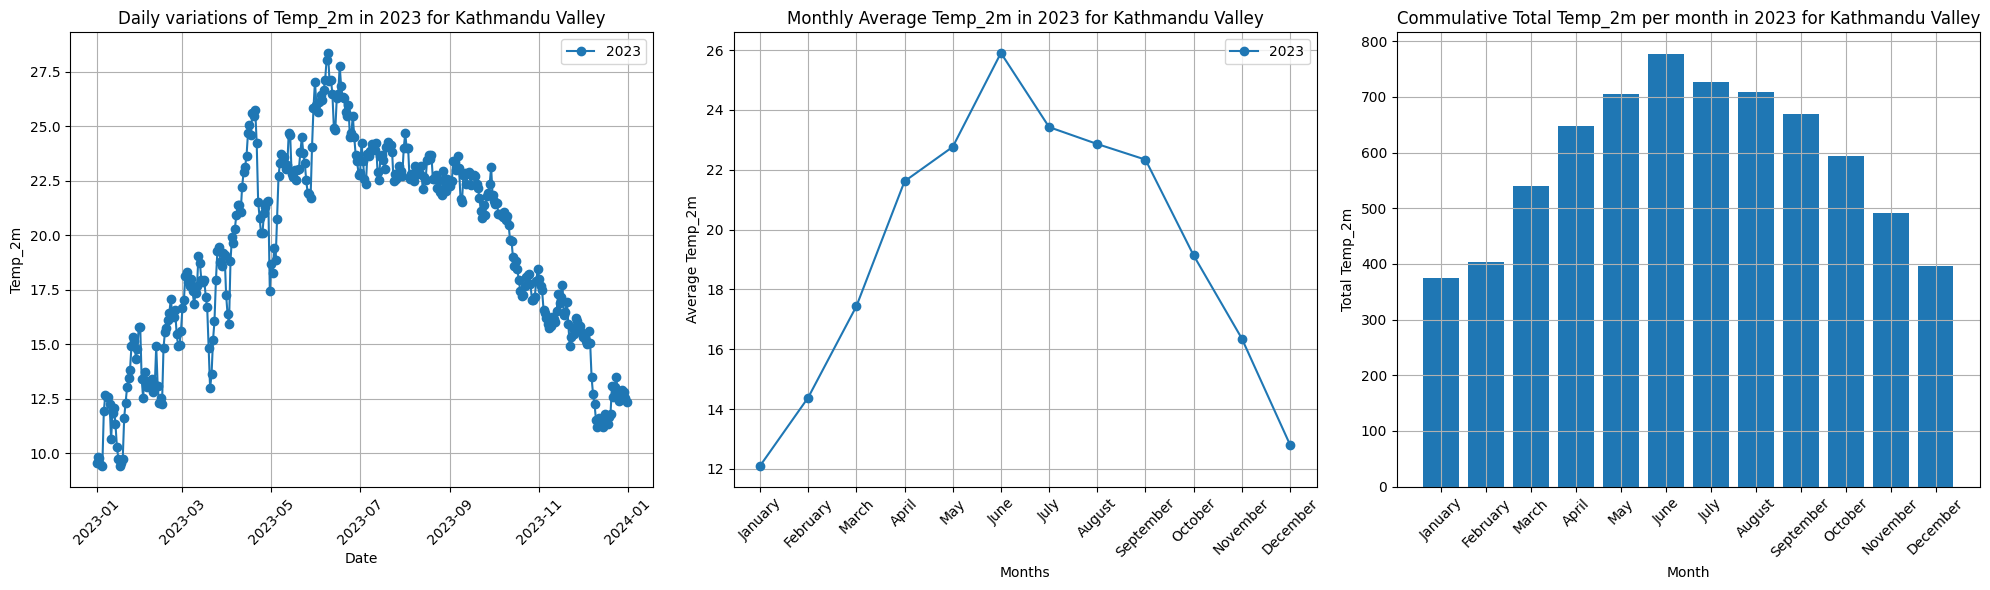

In [ ]:
# Temperature overview of Kathmandu valley in 2023
plot_variable_for_year(df, 'Temp_2m', 2023)

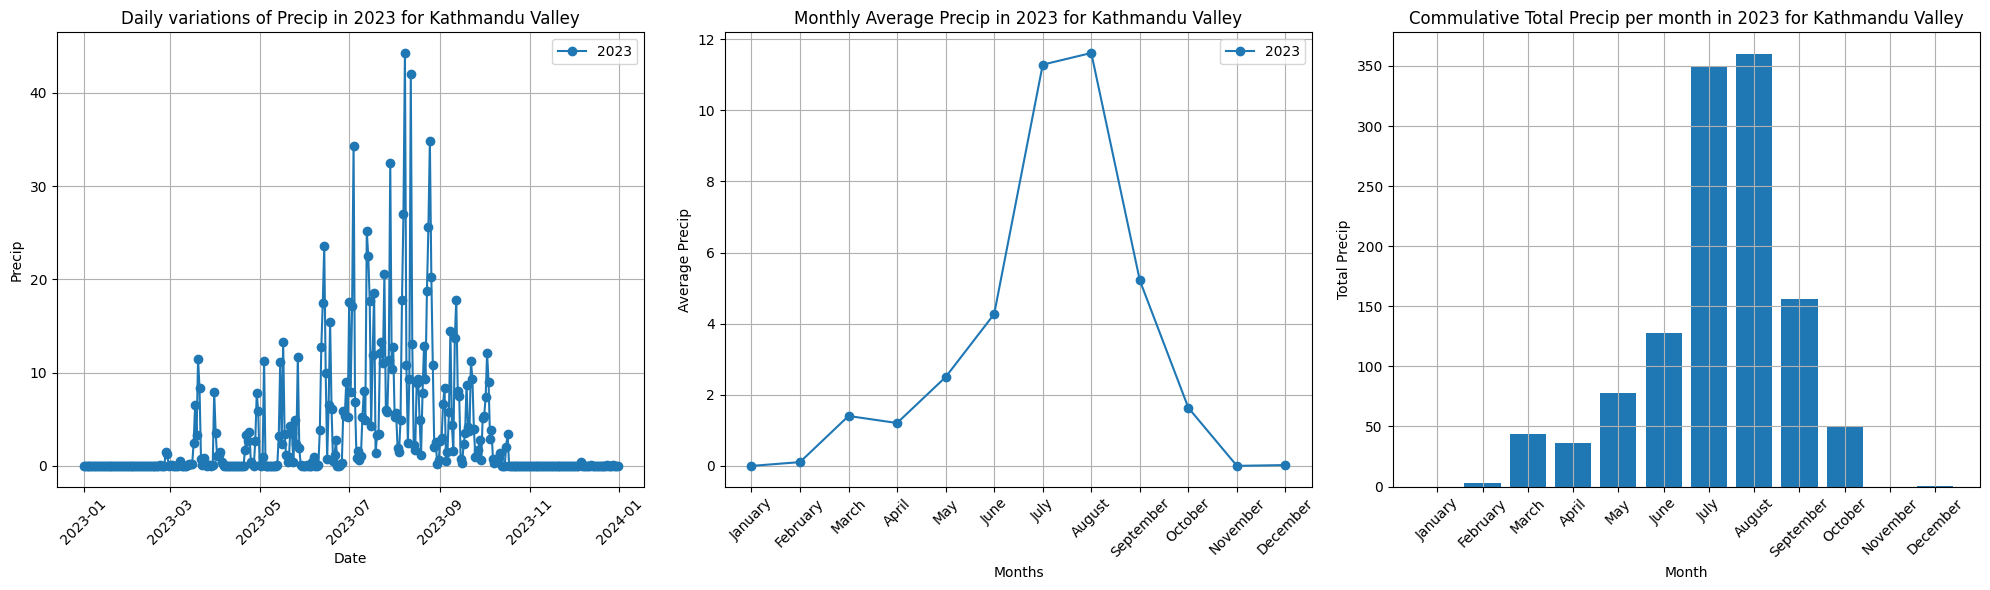

In [ ]:
# Precipation Overview of Kathmandu valley
plot_variable_for_year(df, 'Precip', 2023)

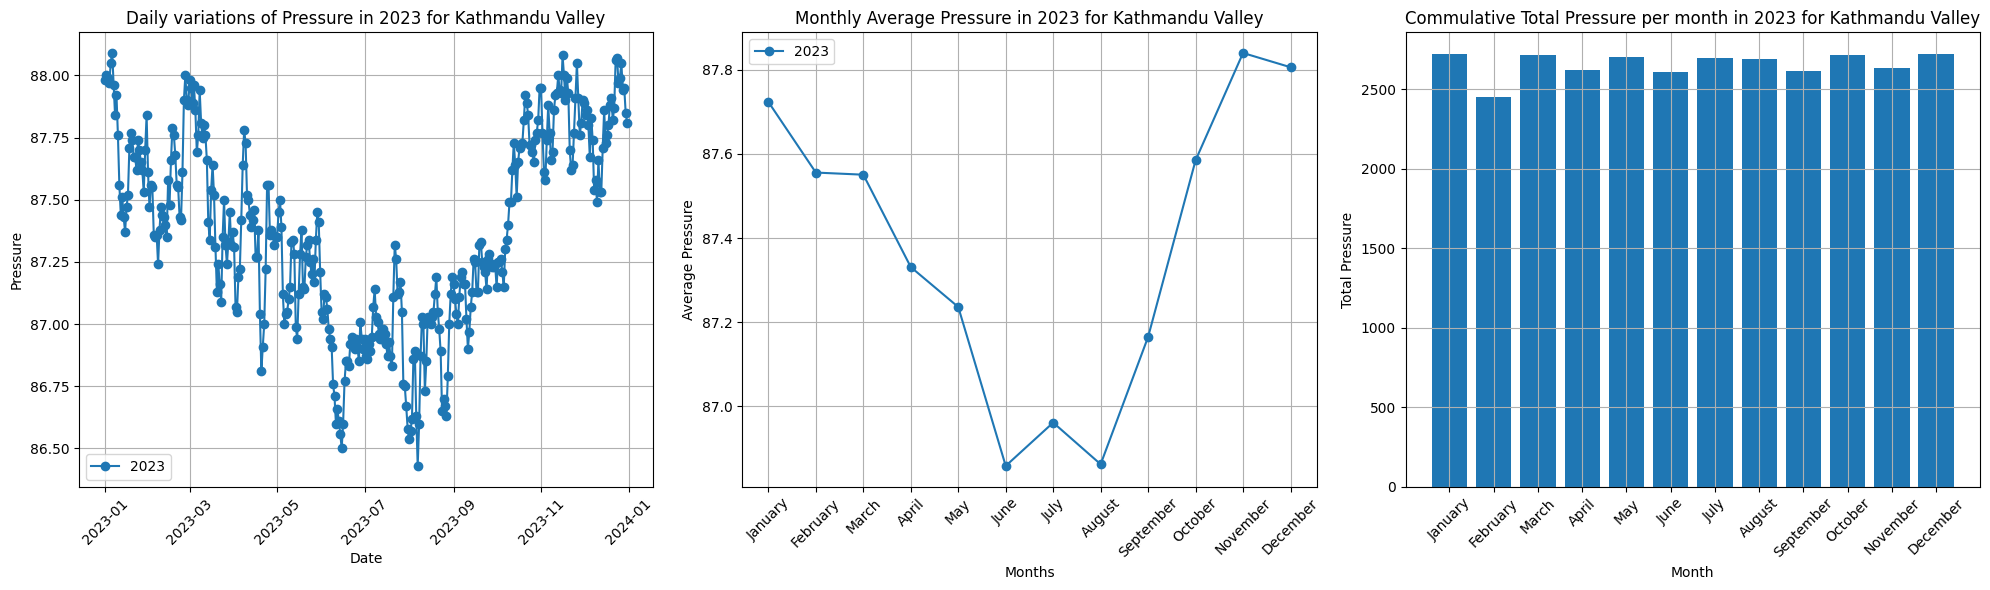

In [ ]:
# Surface Pressure Overview
plot_variable_for_year(df, 'Pressure', 2023)

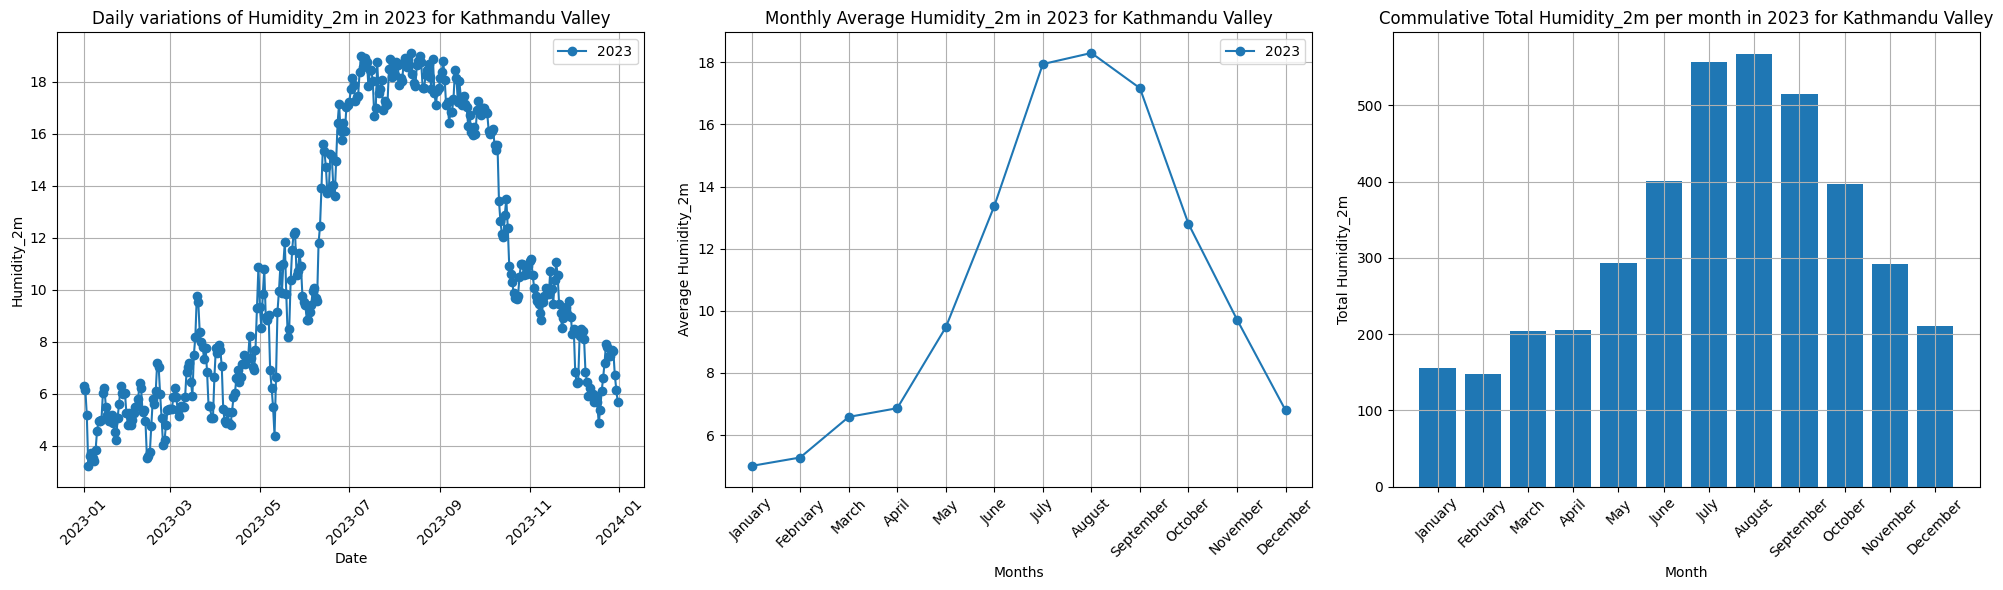

In [ ]:
# Humidity at 2m level for kathmandu valey
plot_variable_for_year(df, 'Humidity_2m', 2023)

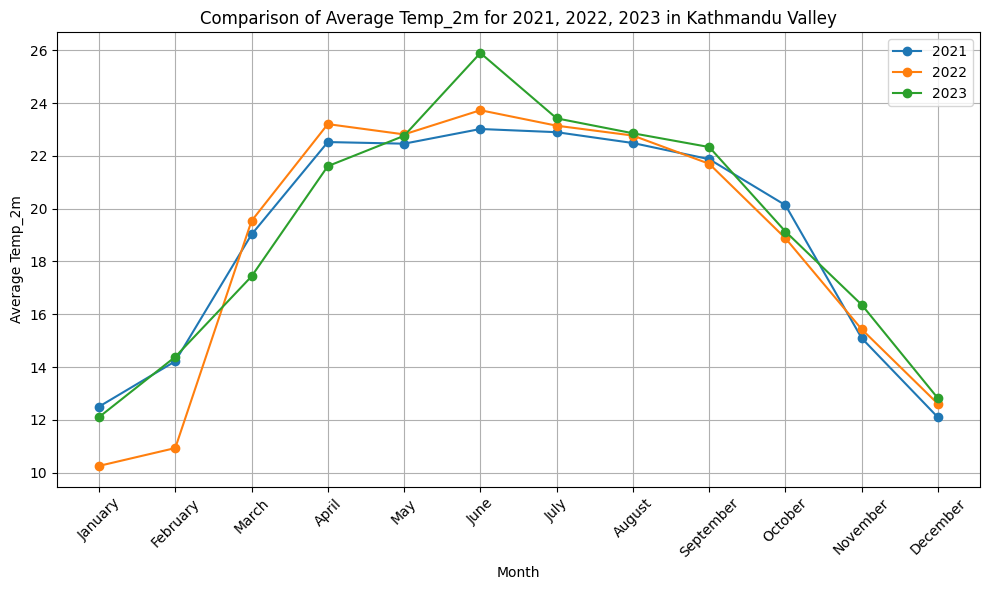

In [ ]:
def get_years_trend(df, variable, years):
    plt.figure(figsize=(10, 6))

    # Iterate over the years in the list
    for year in years:
        # Filter data for the current year
        df_year = df[df['Date'].dt.year == year]
        yearly_monthly_mean = df_year.groupby(df_year['Date'].dt.month)[variable].mean()

        # Plot the line graph for the current year
        plt.plot(yearly_monthly_mean.index, yearly_monthly_mean.values, label=f'{year}', linestyle='-', marker='o')

    plt.xlabel('Month')
    plt.ylabel(f'Average {variable}')
    plt.title(f'Comparison of Average {variable} for {", ".join(map(str, years))} in Kathmandu Valley')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)  # Map month numbers to month names
    plt.tight_layout()
    plt.show()

# Example usage:
years_list = [2021, 2022, 2023]
get_years_trend(df, 'Temp_2m', years_list)


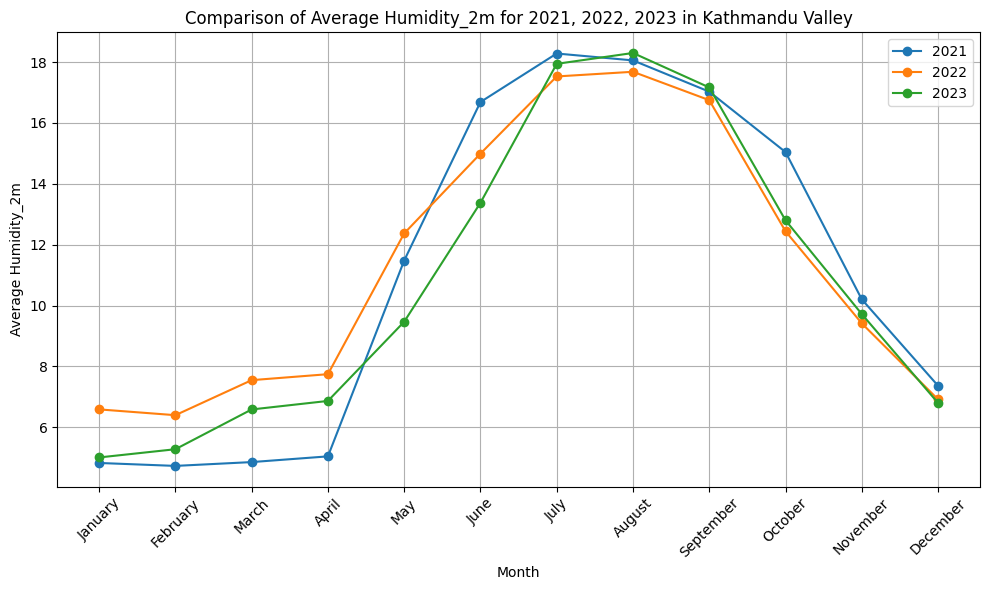

In [ ]:
get_years_trend(df, 'Humidity_2m', years_list)

In [ ]:
from ipywidgets import interact, Dropdown

# Function to update the plot based on selected year and variable
def update_plot(year, variable):
    # Filter data for the selected year
    df_selected_year = df[df['Date'].dt.year == year]

    # Group by month and calculate mean temperature for each month
    variable_by_month = df_selected_year.groupby(df_selected_year['Date'].dt.month)[variable].mean()

    # Convert month numbers to month names
    variable_by_month.index = variable_by_month.index.map(lambda x: calendar.month_name[x])

    # Plot the bar graph
    plt.figure(figsize=(8, 6))
    variable_by_month.plot(kind='bar', color='orange')
    plt.xlabel('Month')
    plt.ylabel(f'Average {variable}')
    plt.title(f'{variable} Distribution in {year} (by Month)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [ ]:
from ipywidgets import interact, Dropdown

# List of variables
variable_list = ['Pressure', 'WindSpeed_2m', 'MaxWindSpeed_2m', 'MinWindSpeed_2m', 'WindSpeedRange_2m',
                 'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m', 'WindSpeedRange_10m',
                 'Temp_2m', 'WetBulbTemp_2m', 'EarthSkinTemp', 'TempRange_2m', 'MaxTemp_2m',
                 'MinTemp_2m', 'Humidity_2m', 'RH_2m', 'Precip']

# Dropdown widget to select year
year_dropdown = Dropdown(
    options=list(range(1982, 2024)),
    value=2023,
    description='Select Year:',
    disabled=False,
)

# Dropdown widget to select variable
variable_dropdown = Dropdown(
    options=variable_list,
    value='Temp_2m',
    description='Select Variable:',
    disabled=False,
)

# Display the dropdowns and initial plot using interact
interact(update_plot, year=year_dropdown, variable=variable_dropdown);


interactive(children=(Dropdown(description='Select Year:', index=41, options=(1982, 1983, 1984, 1985, 1986, 19…

In [ ]:
def update_plot_variable_for_year(variable, year):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

    # Filter data for the specified year
    df_year = df[df['Date'].dt.year == year]

    # Plot the line graph for the specified year
    ax1.plot(df_year['Date'], df_year[variable], label=f'{year}', linestyle='-', marker='o')
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{variable}')
    ax1.set_title(f'Daily variations of {variable} in {year} for Kathmandu Valley')
    ax1.legend()
    ax1.grid(True)
    ax1.tick_params(axis='x', rotation=45)

    #get the mean and draw plot
    yearly_monthly_mean = df_year.groupby(df_year['Date'].dt.month)[variable].mean()
    # Plot the line graph for the specified year
    ax2.plot(yearly_monthly_mean.index, yearly_monthly_mean.values, label=f'{year}', linestyle='-', marker='o')
    ax2.set_xlabel('Months')
    ax2.set_ylabel(f'Average {variable}')
    ax2.set_title(f'Monthly Average {variable} in {year} for Kathmandu Valley')
    ax2.legend()
    ax2.grid(True)
    ax2.set_xticks(range(1, 13), calendar.month_name[1:], rotation=45)  # Map month numbers to month names
    ax2.tick_params(axis='x', rotation=45)

    # Plot the bar diagram of total for the specified year
    monthly_totals = df_year.groupby(df_year['Date'].dt.month)[variable].sum()
    ax3.bar(monthly_totals.index, monthly_totals)
    ax3.set_xlabel('Month')
    ax3.set_ylabel(f'Total {variable}')
    ax3.set_title(f'Commulative Total {variable} per month in {year} for Kathmandu Valley')
    ax3.grid(True)
    ax3.set_xticks(range(1, 13), calendar.month_name[1:], rotation=45)  # Map month numbers to month names

    plt.tight_layout()
    plt.show()


In [ ]:
from ipywidgets import interact, Dropdown

# List of variables
variable_list = ['Pressure', 'WindSpeed_2m', 'MaxWindSpeed_2m', 'MinWindSpeed_2m', 'WindSpeedRange_2m',
                 'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m', 'WindSpeedRange_10m',
                 'Temp_2m', 'WetBulbTemp_2m', 'EarthSkinTemp', 'TempRange_2m', 'MaxTemp_2m',
                 'MinTemp_2m', 'Humidity_2m', 'RH_2m', 'Precip']

# Dropdown widget to select year
year_dropdown = Dropdown(
    options=list(range(1982, 2024)),
    value=2023,
    description='Select Year:',
    disabled=False,
)

# Dropdown widget to select variable
variable_dropdown = Dropdown(
    options=variable_list,
    value='Temp_2m',
    description='Select Variable:',
    disabled=False,
)

# Display the dropdowns and initial plot using interact
interact(update_plot_variable_for_year, year=year_dropdown, variable=variable_dropdown);


interactive(children=(Dropdown(description='Select Variable:', index=9, options=('Pressure', 'WindSpeed_2m', '…